In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
import matplotlib.ticker as tick
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

rcdict = {
    
    'grid.linewidth': 1,
    'xtick.major.size': 0,
    'ytick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.minor.size': 0 
    
}

sns.set(font_scale=2, style='white')
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['text.usetex'] = True

COLOR_P = [
    
    '#4078c0',
    '#6cc644',
    '#bd2c00',
    '#c9510c',
    '#6e5494'
    
]

root = '../mph/output'
data = pd.read_csv(os.path.join(root, '83nm_ka0.5_far.txt'), comment='%', header=None)
data.rename(columns={0 : 'theta', 1 : 'r'}, inplace=True)

data2 = pd.read_csv(os.path.join(root, '830nm_ka0.5_far.txt'), comment='%', header=None)
data2.rename(columns={0 : 'theta', 1 : 'r'}, inplace=True)

In [49]:
#data.theta = data.theta.apply(lambda x: )

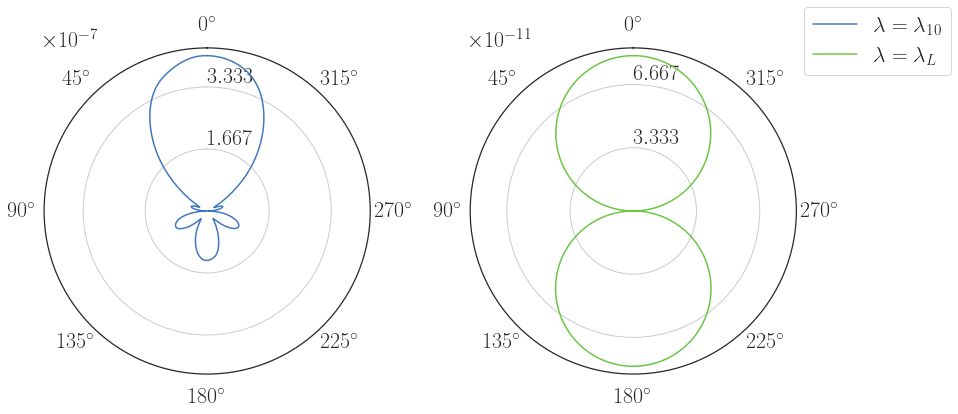

In [5]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': 'polar'})

for a in (ax, ax2):
    a.set_rlabel_position(0)
    a.set_xticklabels([r'$0^{\circ}$', r'$45^{\circ}$', r'$90^{\circ}$',
                           r'$135^{\circ}$'] + [r'$180^{\circ}$', r'$225^{\circ}$',
                           r'$270^{\circ}$', r'$315^{\circ}$'])
    a.set_theta_zero_location('N')
    a.set_theta_direction(1)
    a.tick_params(axis='x', which='major', pad=10)

sns.lineplot(
    x=data.theta.to_numpy(), 
    y=data.r.to_numpy(), 
    linestyle='solid', 
    color=COLOR_P[0], 
    ax=ax,
    label=r'$\lambda = \lambda_{10}$',
    legend=0
)

sns.lineplot(
    x=data2.theta.to_numpy(), 
    y=data2.r.to_numpy(), 
    linestyle='solid', 
    color=COLOR_P[1], 
    ax=ax2,
    label=r'$\lambda = \lambda_{L}$',
    legend=0
)

ax.set_rticks([i for i in np.linspace(0, 5e-7, 4)[1:-1]])
ax2.set_rticks([i for i in np.linspace(0, 1e-10, 4)[1:-1]])
#ax.set_ylim(0, 1e-10)
#ax2.set_ylim(0, 1.5e-7)

ax.grid(axis='x')
ax2.grid(axis='x')
#ax.set_rticks([])

handles, labels = [(a + b) for a, b in zip(ax.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
lgd = fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1)) 
#lgd = ax.legend(loc='upper right', bbox_to_anchor=(1.9, 1))
fig.savefig('../components/img/mph/ka0.5_far_field.pdf', bbox_inches='tight', bbox_extra_artists=(lgd,))
#plt.ylim(0.00, 1e-10)